<a href="https://colab.research.google.com/github/kjguruprasad/linearalgebra/blob/main/20240204DelDueck_LAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra 1
This notebook is intended to be a companion of our Linear Algebra Class

### Content
*  1st hour:
    - Why Linear Algebra
    - Vectors notation and properties
    - Vector Decomposition
    - Norm, Angle, distance, projections
    - Dot Product of Vectors
    - Cross Product of Vectors
* 2nd Hour:
    - Vector Demo in Python
    - Linear Independence
    - Orthogonality
    - Definition of Matrix
    - Understanding matrix as system of linear regression
    - Understanding matrix as system of vectors
    - Matrix addition, scalar multiplication
* 3rd Hour:
    - Matrix Multiplication
    - Linear Transformation
    - Determinant
    - Rank of Matrix
    - Row echelon form
    - Singular Matrix
    - Invertible matrices
    - Transpose of matrices & properties
* 4th Hour:
  - Inverse of matrices
  - Apply matrix algebra, transpose and zero and identity matrices
  - Diagonalization
  - Eigenvalues
  - Eingevectors

## Vectors
* Magnitute and Direction
* Examples: Force, Velocity
* Basic Operations:
    - Sum and Substraction: Same Direction, Opposite Direction,
    - Parallelogram Law
    - Scalar Multiplication
    - Vector Decomposition
    - Norm
    - Distance
* Dot Product
* Angle
* Projection
* Cross Product
* Linear Independence & Orthogonality
* Usages
* Python Applications
### Magnitude and Direction
Vectors always have magnitude (also called norm or length) and direction (often represented by angles)
### Vectors in Python
Vectors in Python are simply numpy arrays. You can create then using np.array():

In [ ]:
import numpy as np
a_2d = np.array([2,2])
b_2d = np.array([3,3])

**a and b vectors:**

![a_b.png](attachment:a4b7c8d6-2002-4730-a35e-e90c4da1f1b7.png)


### Addition and Substraction
To sum two vectors that have the same direction, the result will be a vectore with the same direction and summed lengths:

In [ ]:
c_2d = a_2d + b_2d
print(c_2d)

[5 5]


Representation:

![sum_a_b.png](attachment:d5c6d859-6e00-415b-b341-f6a3e0fd30f3.png)

Remember that substraction (a-b) can also be represented by an addition (a+(-b)):

![substraction.png](attachment:5070b0ae-83a0-4315-b28f-db94c755fbb2.png)

When the two vectors have different directions, we can use the parallelogram law (or the triangle law):

![parallelogram.png](attachment:edfee2dd-555f-4f92-806a-1bdb0aac04ad.png)

Given the length of each vector and the angle between then, we can calculate the length and angle of the result:

![parallelogram_formula.png](attachment:c8b4283a-e45b-4c59-9884-1a4194811cfb.png)

***
### Scalar Multiplication
Multiplying a vector by a scalar give us a vector with the same direction:

![scalar_mult.png](attachment:b75633e8-531d-4750-8558-dfd0097102a5.png)


In [ ]:
a = [3,3]
b = 3* a
print(b)

[3, 3, 3, 3, 3, 3]


In [ ]:
import numpy as np
a = np.array([3,3])
b = 3*a
print(b)

[9 9]


### Decomposition of a Vector
We have already being using this notation, but showing a vector as a composite of 1-dimension vectors is useful, because we know how to deal with scalars:

![decompose.png](attachment:ed5ed46a-b372-40e6-b729-88ed18ed7a07.png)


### Norm
Norm is the length of the vector (magnitude). We can calculate it using the decompositions we just mentioned:
![norm.png](attachment:97ad7e18-3c15-43d7-a4cf-39baebd4882f.png)

In Python we could calculate it using the np.linalg.norm() function:

In [ ]:
import math
import numpy as np
a = np.array([8,4])
length = math.sqrt((8**2)+(4**2))
print(length)

8.94427190999916


In [ ]:
x = np.linalg.norm(a)
print(x)

8.94427190999916


### Distance
Distance is a very used calculation in many ML algorithms (such as k-means clusters). We use the following formula to calculate it:
![distance.png](attachment:16d144f3-3057-4e0d-bcfc-52eb67575e44.png)
It can also be calculated as norm(a-b).
### Example
Let's work with two 2D vectors (a and b):

![example_1a.png](attachment:370057b5-301e-4c1b-8313-8b445a818bf9.png)

Let's calculate the norm of each vector, the norm of the sum of a and b and finally the distance between a and b. Let's do it first using math module and the formulas we just learned:


In [ ]:
a = [10,3]
b = [3,7]
import math
norma = math.sqrt((a[0]**2)+(a[1]**2))
normb = math.sqrt((b[0]**2)+(b[1]**2))
angle_a = math.asin(a[1]/norma)
angle_b = math.asin(b[1]/normb)
teta = angle_b - angle_a
norm_sum = math.sqrt((norma**2)+(normb**2)+2*norma*normb*math.cos(teta))
distance = math.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))
print(f'{norma = }')
print(f'{normb = }')
print(f'{norm_sum = }')
print(f'{distance = }')

norma = 10.44030650891055
normb = 7.615773105863909
norm_sum = 16.401219466856727
distance = 8.06225774829855


It makes more sense to use NumPy norm function:

In [ ]:
a = np.array(a)
b = np.array(b)

norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
norm_sum = np.linalg.norm(a+b)
distance = np.linalg.norm(a-b) #distance
print(f'{norma = }')
print(f'{normb = }')
print(f'{norm_sum = }')
print(f'{distance = }')

norma = 10.44030650891055
normb = 7.615773105863909
norm_sum = 16.401219466856727
distance = 8.06225774829855


### Dot Product
Dot product, or scalar product, represents how close the vectors align. If 0, the vectors are orthogonal, if positive, they are aligned to "similar" directions. It can be calculated using the scalar coordinates of the vectors:

![dot_1.png](attachment:856c88aa-90f6-45fd-816c-9825deb412e2.png)

Or the magnitudes and angle:

![dot_2.png](attachment:720866c5-04db-4416-947d-e086daa14808.png)

Two 2D vectors examples with angle<90:

![dot_3.png](attachment:d8ded7a8-e4fe-4912-a92d-5981600ae6eb.png)


In [ ]:
u = np.array([3,7])
v = np.array([10,3])
teta = math.acos((u[0]*v[0]+u[1]*v[1])/(math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2))) # We will see this formula soon.
dot_uv = math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2)*math.cos(teta)
print(dot_uv)
dot_uv_alt = u[0]*v[0]+u[1]*v[1]
print(dot_uv_alt)
print(np.dot(u,v))

51.0
51
51


Two 2D vectors examples with angle=180:

![dot_4.png](attachment:3c865067-96c7-43ec-ad1a-047e76e92925.png)

In [ ]:
u = np.array([-2,-3])
v = np.array([2,3])
teta = math.pi
dot_uv = math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2)*math.cos(teta)
print(dot_uv)
dot_uv_alt = u[0]*v[0]+u[1]*v[1]
print(dot_uv_alt)
print(np.dot(u,v))

-12.999999999999998
-13
-13


Two 2D vectors examples with angle=90:

![dot_6.png](attachment:13a1bdb4-fa02-4ce5-90a5-a77e12148f89.png)

In [ ]:
u = np.array([4,0])
v = np.array([0,4])
teta = math.pi/2
dot_uv = math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2)*math.cos(teta)
print(dot_uv)
dot_uv_alt = u[0]*v[0]+u[1]*v[1]
print(dot_uv_alt)
print(np.dot(u,v))

9.797174393178826e-16
0
0


Quick reminder of how cos(x) behave:

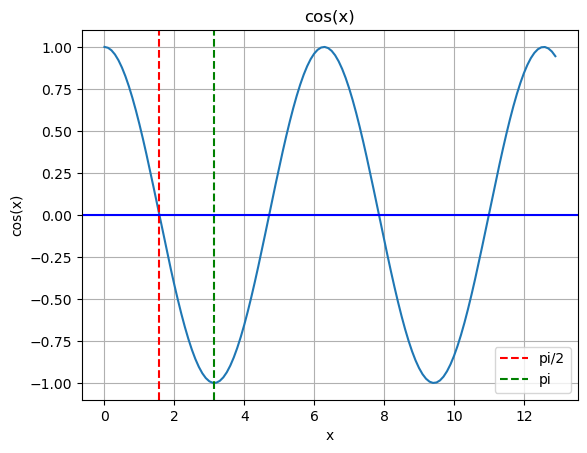

In [ ]:
x = [i/10 for i in range(0,130)]
y = [math.cos(j) for j in x]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('cos(x)')
plt.grid(True)
plt.axvline(x=math.pi/2, color='r', linestyle='--', label='pi/2')
plt.axvline(x=math.pi, color='g', linestyle='--', label='pi')
plt.axhline(y=0, color='b', linestyle='-')
plt.legend()
plt.show()

### Angle
To calculate angle of two vectors, we use simple geometry:

![angle.png](attachment:d305ca60-c7b3-4d8d-99b8-760f54ea6afa.png)

The easiest way to calculate angle is to use arc cos of dot(u,v)/norm(u)*norm(v):

![angle_2.png](attachment:f67036e7-00ae-4604-a39b-4cdce709411e.png)

In [ ]:
a = np.array([10,3,2,3])
b = np.array([3,7,4,5])
import math
import numpy as np
angle = math.acos((np.dot(a,b))/(np.linalg.norm(a)*np.linalg.norm(b)))
print(f'{angle = } rads')
print(f'{math.cos(angle) = }')

angle = 0.8320796291729496 rads
math.cos(angle) = 0.673339678200224


### Projection
Projection is the shadow of a vector in another vector:

![projection1.png](attachment:14cde457-5746-4d08-9f38-a55ed74409a7.png)

To calculate the magnitude of the projection we can use the dot product divided by the norm of the second vector:

![projection2.png](attachment:96cf3451-012a-4640-bb63-9b196074bcb0.png)

Then, to figure out the vector itself, we just need to do a scalar multiplication on the second vector. We will multiply the vector by the ratio of norm(projection)/norm(second vector):

![projection3.png](attachment:cd9afa39-6e0b-4aaa-9a5f-9a313e612975.png)




### Example

In [ ]:
a = np.array([1,-2,3])
b = np.array([2,4,5])
norm_b = np.linalg.norm(b)
dot_ab = np.dot(a,b)
norm_proj = dot_ab/norm_b
print(norm_proj/norm_b)
proj = (norm_proj/norm_b)*b
print(proj)

0.19999999999999998
[0.4 0.8 1. ]


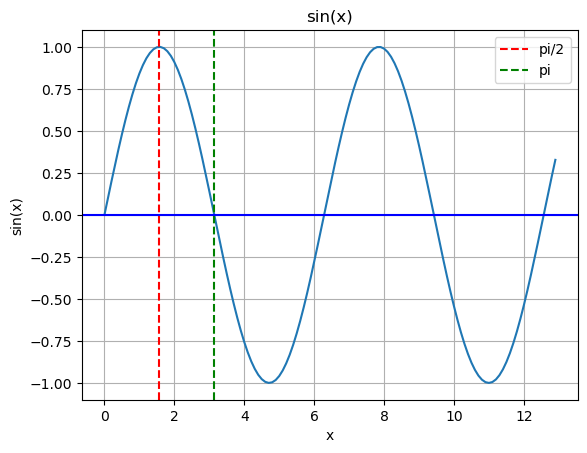

In [ ]:
x = [i/10 for i in range(0,130)]
y = [math.sin(j) for j in x]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('sin(x)')
plt.grid(True)
plt.axvline(x=math.pi/2, color='r', linestyle='--', label='pi/2')
plt.axvline(x=math.pi, color='g', linestyle='--', label='pi')
plt.axhline(y=0, color='b', linestyle='-')
plt.legend()
plt.show()

### Cross Product
A cross product of u x v is a vector. The direction of it will be perpendicular to the plan of u and v. The magnitude of the vector is given by:

![cross_product.png](attachment:5a9aca81-24fc-4a25-b44a-13a5f9de7c07.png)

The direction it will also be perpendicular of the plan of u and v:

![cross_product2.png](attachment:25fb806c-973c-4bfb-af6c-6bae350cdc12.png)

We can also use matrix notation to calculate the corr product of two vectors:

![cross_product3.png](attachment:1cd8025c-74f3-40b9-abf9-5b7fd22c3e11.png)

### Example:

In [ ]:
# Using only math module
u = [1,2,5]
v = [2,-4,5]
norm_u = math.sqrt(u[0]**2+u[1]**2+u[2]**2)
norm_v = math.sqrt(v[0]**2+v[1]**2+v[2]**2)
w = [u[1]*v[2]-u[2]*v[1],-u[0]*v[2]+u[2]*v[0],u[0]*v[1]-u[1]*v[0]]
print(f'u x v coordinates are: {w}')
norm_w = math.sqrt(w[0]**2+w[1]**2+w[2]**2)
print(f'|u x v| = {norm_w}')
dot_wu = w[0]*u[0]+w[1]*u[1]+w[2]*u[2]
dot_wv = w[0]*v[0]+w[1]*v[1]+w[2]*v[2]
angle_wu = math.acos(dot_wu/(norm_w*norm_u))
angle_wv = math.acos(dot_wv/(norm_w*norm_v))
print(f'The angle between w and u is {math.degrees(angle_wu)} degrees')
print(f'The angle between w and v is {math.degrees(angle_wv)} degrees')


u x v coordinates are: [30, 5, -8]
|u x v| = 31.448370387032774
The angle between w and u is 90.0 degrees
The angle between w and v is 90.0 degrees


In [ ]:
# Using NumPy
u = np.array([1,2,5])
v = np.array([2,-4,5])
w = np.cross(u,v)
print(f'u x v coordinates are: {w}')
norm_w = np.linalg.norm(w)
print(f'|u x v| = {norm_w}')

u x v coordinates are: [30  5 -8]
|u x v| = 31.448370387032774


## Matrices
* Classic Notation
* Matrices as Linear Equations
* Ploting a Matrix as Vectors
* Matrix Operations
    - Addition of two matrices of the same size
    - Scalar Multiplication
    - Matrix Multiplication
* Linear Transformation
* Determinant
* Rank of a Matrix
* Row Echolon Form
* Singular
* Transpose of Matrix
* Inverse of Matrix
* Eigenvector & Eigenvalue

### Classic Notation
A classic notation of a mxn matrix:

![matrix_notation.png](attachment:b49490cd-df01-4bfd-96f1-10726734c0b0.png)



### Matrices as Linear Equations

Linear Equations can alsways be represented by a matrix:

![linear_equations.png](attachment:86410538-2a15-423c-8543-f2f571d413cc.png)

2D equations can easily be solved visually.



### Matrices as Vectors
Another way to visualize a matrix is as vectors.

![matrix_as_vectors.png](attachment:41047184-86e0-44eb-b39a-5fc834ea4ea5.png)


### Matrix Operations
- Addition of two matrices of the same size
- Scalar Multiplication
- Matrix Multiplication

**Addition**

Given two matrices with same dimensions, the sum of the two matrices will have each element as the sum of elements at the corresponding positions:

![addition_matrices.png](attachment:0ed3be70-af13-48d2-aaae-a13f880c2879.png)

In [ ]:
import numpy as np
A = np.array([[1,2],[2,4]])
B = np.array([[10,1],[5,3]])
print(A+B)

[[11  3]
 [ 7  7]]


**Scalar Multiplication**

Multiplying a matrix by a scalar will result in a matrix with same dimension, each element will be multiplied:

![scalar_multiplication.png](attachment:e39d8f81-1221-4fac-a8ca-d63fbd7a6798.png)


In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(3*A)

[[ 3  6  9]
 [12 15 18]
 [21 24 27]]


Scalar Addition will work in the same manner, adding 3 to a matrix will result in a new matrix with each element added 3.

**Matrix Multiplication**

Matrix multiplication is less trivial than the other operations, each element will be the sum of multiplication of corresponding elements of each row of the first matrix by the corresponding elements of each column of the second matrix:

![matrix_multiplication.png](attachment:8e3036ea-7059-4be5-9aa8-cccd60039581.png)

The resulting matrix has the same number of rows as the first matrix and the same number of columns as the second matrix. The number of columns in the first matrix must be equal to the number of rows in the second matrix for matrix multiplication to be possible.

![matrix_mult_2.png](attachment:a8e8c8ab-2145-4ca0-8e7d-afbcd5ec3858.png)

np.matmul can help with the calculation. Remember that AB is not equal as BA.

In [ ]:
import numpy as np
A = np.array([[1,2],[2,1]])
B = np.array([[2,1],[1,2]])
E = A*B ##### Careful, this is an array multiplication
print(E)
C = np.matmul(A,B)
D = np.matmul(A,C)
print(D)

[[2 2]
 [2 2]]
[[14 13]
 [13 14]]


In [ ]:
A = np.array([[1,-2,1],[2,1,3]])
B = np.array([[2,1],[3,2],[1,1]])
C = np.matmul(A,B)
D = np.matmul(B,A)
print(C)
print(D)

[[-3 -2]
 [10  7]]
[[ 4 -3  5]
 [ 7 -4  9]
 [ 3 -1  4]]


### Linear Trasnformation

Imagine a [0,1],[1,0] matrix:

![LT1.png](attachment:ab7e03e3-cb93-49b7-b032-6f323013750b.png)

Any Linear Transformation will follow the grid created by the orthogonal vectors.

If a matrix is given as [0,1],[1,1], the grid will be different, this can be interpreted as how the matrix "moves".

![LT2.png](attachment:fdd0eccf-7bbf-4829-a423-37a862e26a94.png)

### Determinant
Determinants is a scalar value that represents the matrix. It is an useful tool to understand if the matrix has an inverse. One way to conceptualize the determinant is as the area/volume of the parallelogram/parallelepiped that the vectors of the matrix represents.

For a 2x2 matrix A = [[a, b], [c, d]], the determinant is given by det(A) = ad - bc.
For a 3x3 matrix A = [[a, b, c], [d, e, f], [g, h, i]],, we can choose a row and and use the following formula:
Det(A) = a (ei − fh) − b (di − fg) + c (dh − eg)

![det3_3.png](attachment:daaef5c3-6bcf-4744-a114-aa72e4a5938c.png)

**Example**:

![det.png](attachment:1772e1b8-2d51-4770-bd94-d51869e0a895.png)


In [ ]:
A = np.array([[2,-3,1],[2,0,-1],[1,4,5]])
det = np.linalg.det(A)
print(det)

49.000000000000014


### Rank of a Matrix
Rank of a matrix can be used to understand how many rows/columns are unique.The rank of a matrix is also closely related to the determinant of the matrix. Specifically, a matrix is invertible if and only if its determinant is nonzero, which is equivalent to its rank being equal to its size.

**Example:**
A Matrix A has two rows/columns:

![rank.png](attachment:4f0464d6-f147-440c-aba0-8c65c6a13f74.png)

Even though, there is 2 rows, they are linear dependent. So the Rank of this matrix is 1.


In [ ]:
import numpy as np
A = np.array([[2,1],[4,2]])
rank = np.linalg.matrix_rank(A)
print(rank)

1


### Row Echolon Form to Find Rank (and solve linear equations)
Simple row transformations can be used to represent a matrix in their simplest versions (Row Echolon Form)

![row_echolon.png](attachment:22c06cd2-5ad1-4974-bab0-b1d3d4a03d51.png)

The number of non-zero rows represents the rank of the matrix. Rank(B) = 2

In [ ]:
from sympy import *
A = Matrix([[1,2,1],[-2,-3,1],[3,5,0],[2,4,2]])
print(A)
B = A.rref()
print(B)

Matrix([[1, 2, 1], [-2, -3, 1], [3, 5, 0], [2, 4, 2]])
(Matrix([
[1, 0, -5],
[0, 1,  3],
[0, 0,  0],
[0, 0,  0]]), (0, 1))


In [ ]:
import numpy as np
A = np.array([[1,2,1],[-2,-3,1],[3,5,0],[2,4,2]])
print(np.linalg.matrix_rank(A))

2


### Transpose
The transpose of a matrix is the matrix with i and j coordinates flipped.

If:

![transpose.png](attachment:38f2ac12-8a55-4b0f-9b80-9eb6665ac9e6.png)

Then:

![transpose2.png](attachment:f25d38cf-3a8d-4f15-842a-9574d3796116.png)

In [ ]:
import numpy as np
matrix = np.array([[1, 2], [3, 4]])
transpose_matrix = np.transpose(matrix)
transpose_of_transpose = np.transpose(transpose_matrix)
print("Original matrix:\n", matrix)
print("Transpose matrix:\n", transpose_matrix)
print("Transpose of transpose matrix:\n", transpose_of_transpose)

Original matrix:
 [[1 2]
 [3 4]]
Transpose matrix:
 [[1 3]
 [2 4]]
Transpose of transpose matrix:
 [[1 2]
 [3 4]]


### Inverse
The inverse of a square matrix A is another matrix A^-1 that, when multiplied by A, gives the identity matrix I.

More formally, for a square matrix A, its inverse A^-1 is defined as:

A * A^-1 = A^-1 * A = I

where I is the identity matrix of the same size as A.

Not all square matrices have inverses, and a square matrix A has an inverse if and only if its determinant is nonzero. In that case, the inverse can be found using a formula that involves the determinant and the adjugate (also known as the classical adjoint) of A.

The adjugate of a matrix A, denoted adj(A), is the transpose of the matrix of cofactors of A, where the cofactor of an element a_ij is (-1)^(i+j) times the determinant of the submatrix obtained by deleting the i-th row and j-th column of A.

The formula for the inverse of A is then:

A^-1 = (1/det(A)) * adj(A)

where det(A) is the determinant of A.

The inverse of a matrix has many important applications, such as solving systems of linear equations, finding eigenvectors and eigenvalues, and diagonalizing matrices.

![Inverse.png](attachment:f169d771-778b-414a-8ed2-5e013f5f25de.png)

To calculate the inverse you need to use the following formulas:

![Inverse1.png](attachment:afd3b2da-c7aa-4959-a547-07c13c2d9eae.png)

**Example 2x2**

![Inverse2.png](attachment:6a675fb7-addc-453f-850a-2b271489e3c2.png)




In [ ]:
A = np.array([[4,7],[2,6]])
AInv = np.linalg.inv(A)
print(AInv)

[[ 0.6 -0.7]
 [-0.2  0.4]]


**Example 3x3**

![inverse33.png](attachment:b9615dbb-206e-42ec-a675-576dd17d1e0d.png)

First let's calculate C:

![Inverse C.png](attachment:e9e7ded8-e436-4ed9-926b-43839e26afef.png)

CT:

![InverseCt.png](attachment:f7c64449-27d0-4c7d-b3f8-d54169c37e88.png)

Inverse:

![Inverse Solution.png](attachment:5a19e043-0987-4bd2-a23b-0895242a7e72.png)


In [ ]:
A = np.array([[1,2,-1],[2,1,2],[-1,2,1]])
AInv = np.linalg.inv(A)
print(AInv)

[[ 0.1875  0.25   -0.3125]
 [ 0.25    0.      0.25  ]
 [-0.3125  0.25    0.1875]]


### Eigenvectors & EigenValues
An eigenvector of a matrix A is a nonzero vector x that, when multiplied by A, results in a scalar multiple of x. This scalar multiple is called the eigenvalue corresponding to the eigenvector x. Mathematically, we can represent this as:

A x = λ x

where λ is the eigenvalue and x is the eigenvector.

![eigen.png](attachment:97fcfeaf-4ba4-4e4c-be9c-0f6ccc157376.png)

**Example 2x2**

![eigen22.png](attachment:256b1e98-227b-4d60-b58d-75b74f40a397.png)

To find eigenvalues and their eigenvectors you need to follow two steps:

![eigencalc.png](attachment:fdd2d082-f2e3-4f42-ac72-db8e1c3babb3.png)

**Example**
Find the eigenvalue for:

![eigen3.png](attachment:967eef10-57de-4357-9071-405a81825b0d.png)

First let's find Aλ-I:

![eigen4.png](attachment:01b337af-79c5-4e3e-9041-4c101c9d107a.png)

Then:

![eigen5.png](attachment:ddaa6151-c221-4fa9-b4c6-0e35ea0b39c5.png)




In [ ]:
A = np.mat([[5,4],[1,2]])
print("A: \n", A)
eigenvalue = np.linalg.eig(A)[0]
print("Eigenvalues: \n", eigenvalue)

A: 
 [[5 4]
 [1 2]]
Eigenvalues: 
 [6. 1.]
